<a href="https://colab.research.google.com/github/Mark-Barbaric/Introduction_To_Machine_Learning/blob/master/Session2/Intro_To_Machine_Learning_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 2 - Regression methods 

In [0]:
#importing relevant modules 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline 

## 2.1 - Linear regression

In [0]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [0]:
type(diabetes)

sklearn.utils.Bunch

The data we loaded has a dictionary structure. If you haven't met dictionaries, please look at the information below. 



### _Dictionaries_ <br>
The third most common collection type used in Python is the Dictionary, or dict, which store mappings from keys to values. For every key, there is a value. Unlike lists and tuples, dicts do not preserve the order of the objects in the collection, and rather than the accessing the contents with indices, they are accessed with keys. Values can be any Python object, keys are usually strings, but it is possible to use certain other objects as keys. Dictionary literals are written as a comma-separated list of key:value pairs, with a colon separating key from value, surrounded by (curly) braces. Dict items are accessed using the same square bracket notation as for lists and tuples, but with a key instead of an integer index.<br>

```python
student_grades = {"Simon": 60, "Jenny":68, "Laura":112}
student_grades["Simon"] += 6  # Extra credit
student_grades["Laura"] = 100 # Cap
student_grades["Pug"] = 58    # New student!
print(student_grades["Jenny"])
68
```
<br>
<b>

    


** Now select the key "data" from diabetes. In a seperate variable, select the "target" key. Throughout, remember to select meaningful variable names. Have a look at the description given in the diabetes dictionary, and then from your variable created from the key "data", select the columns Age and Body Mass Index (Hint: they are listed in the order they appear in the list. So, select for instance the first column and all the rows in that column etc.). You can use the lines below as a start, if you want  ** 

In [0]:
x = diabetes["data"][:,[0,2]]
y = diabetes["target"]

We now need to split the data into training and test data. We could select it based on position, but this is very bad practice. Why? The best way to do it is the below. It creates four separate variables. **Uncomment the line below, and substitute the X and y in the funciton with your X and y variables. The random state can be any number you want, it only means it is replicable. What do you think test_size is? If it's unclear, have a look at the documentation for the function by googling scikit learn train_test_split **

In [0]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, random_state=0, test_size = 0.7)

Now we are ready to build our regression model. **Change the variable names in the code below to what you called your variables.** 

In [0]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
# Calculate the linear regression based on the data in the training set
regr.fit(x_train, y_train)

# Make predictions using the testing set
# Try that calculated line in the test set, based on that try to get the 'y' giving the x as input
# which would the y values for that x based on the model I've built
diabetes_y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction, 0 is random 
print('Variance score: %.2f' % r2_score(y_test, diabetes_y_pred))


Coefficients: 
 [ 267.24846162 1044.92144978]
Mean squared error: 4024.86
Variance score: 0.28


**Now plot both the data and the linear fit that you've made in one plot. Note that to make several plots in one, you just list them after each other, i.e. one line with plt.plot(x,y1), and a line below with plt.plot(x,y2). Remember that your prediction lives inside the variable diabetes_y_pred. Is it a good fit?** 

## 2.2- Random forest 

** Now run the code below. Is dataframe a good variable name? If not, change it to something better. **

In [0]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

#you can easily get data from urls into python by doing something like the below
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#the person who maintains the data above has created documentation, where he listed the following as variable names
#I have copied these, so we can set them as column names when we make our panda 
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)
#dataframe

**You'll find people arguing that you don't need to split your data into training and test set. Why do you think they'd argue this? I'll argue it's good practice to split it. Therefore split the data into x and y with training and test sets, just like you did in the linear regression.**

** Complete the cell below. Some of it may not be entirely clear - use the documentation for scikitlearn! ** 

In [0]:
#any random number so the randomness can be replicated 
seed = 
#how many trees do you want?
num_trees = 
#the number of features considered at each split 
max_features = 

#here, we are using a cross validation. 
kfold = model_selection.KFold(n_splits= , random_state=seed )
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

** If you feel up for a challenge, how would you visualise this? Feel free to use the internet :) **

## 2.3 Boosted decision tree 

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [0]:
# This creates a data set we will be using for the example, don't worry too much about this cell 
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

y1

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0])

In [0]:
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X1, y1)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [0]:
# now predict on the test set 
bdt.predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
#how does this compare do the actual values?
y2

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

** Now have a think about how you would visualise the results. Below is some code for doing this. This is a bit more advanced, and don't worry if it isn't quite clear to you what's going on. Play around with the depth and number of estimators given when building the model, and see how this affects the plots. Remember to rerun all the necessary cells to update the predictions after you change the model parameters**

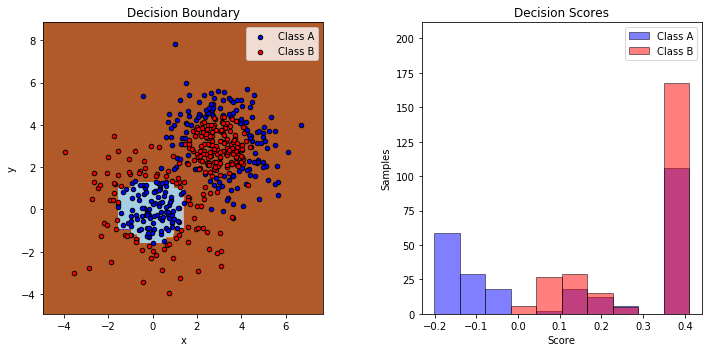

In [0]:

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
#number of rows, columns, 
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

#np.c stacks arrays, ravel combines to list 
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

** All done? Fantastic work! Now choose a data set and play with and compare these models. ** 